In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

# Load cleaned datset
df = pd.read_csv('cleaned_heart_data.csv')

# Convert target to binary
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop('num', axis=1, inplace=True)

# Features and labels
X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [3]:
# Hyperparameter Tuning
# Step 1: GridSearchCV for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score (CV Accuracy):", grid.best_score_)

d:\all past files\desktop f\All files\Passant Programming\.vscode\summer2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\all past files\desktop f\All files\Passant Programming\.vscode\summer2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also w

Best Params: {'C': 1, 'solver': 'lbfgs'}
Best Score (CV Accuracy): 0.8263605442176871


d:\all past files\desktop f\All files\Passant Programming\.vscode\summer2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\all past files\desktop f\All files\Passant Programming\.vscode\summer2\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also w

In [4]:
# Step 2: RandomizedSearchCV for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   random_state=42)

random_search.fit(X_train, y_train)
print("Best Params:", random_search.best_params_)
print("Best Score (CV Accuracy):", random_search.best_score_)

Best Params: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10}
Best Score (CV Accuracy): 0.8221088435374149


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Retrain Random Forest with best parameters
final_model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    max_depth=10,
    random_state=42
)
final_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_final = final_model.predict(X_test)

print("Final Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

Final Model Performance:
Accuracy: 0.8688524590163934

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


Confusion Matrix:
 [[27  6]
 [ 2 26]]


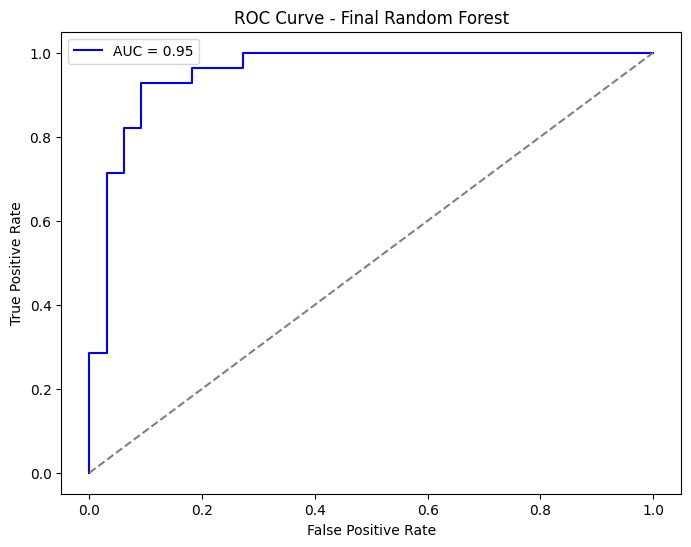

✅ AUC Score: 0.955


In [6]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probability predictions
y_proba_final = final_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_final)
auc_score = roc_auc_score(y_test, y_proba_final)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Final Random Forest")
plt.legend()
plt.show()

print(f"✅ AUC Score: {auc_score:.3f}")

In [ ]:
# Save Model Pipeline
import joblib

joblib.dump(final_model, "heart_disease_model.pkl")
print("Final tuned Random Forest model saved successfully as 'heart_disease_model.pkl'")